# 1. Importing Dependencies and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm
import pickle
%matplotlib inline

In [2]:
df = sns.load_dataset('diamonds')

In [3]:
df.to_csv("diamonds.csv",index=False)

# 2. Exploratory Data Analysis

In [4]:
print(tabulate(df.describe().T,headers=df.describe().T.columns,tablefmt="psql"))

+-------+---------+------------+-------------+-------+--------+---------+---------+----------+
|       |   count |       mean |         std |   min |    25% |     50% |     75% |      max |
|-------+---------+------------+-------------+-------+--------+---------+---------+----------|
| carat |   53940 |    0.79794 |    0.474011 |   0.2 |   0.4  |    0.7  |    1.04 |     5.01 |
| depth |   53940 |   61.7494  |    1.43262  |  43   |  61    |   61.8  |   62.5  |    79    |
| table |   53940 |   57.4572  |    2.23449  |  43   |  56    |   57    |   59    |    95    |
| price |   53940 | 3932.8     | 3989.44     | 326   | 950    | 2401    | 5324.25 | 18823    |
| x     |   53940 |    5.73116 |    1.12176  |   0   |   4.71 |    5.7  |    6.54 |    10.74 |
| y     |   53940 |    5.73453 |    1.14213  |   0   |   4.72 |    5.71 |    6.54 |    58.9  |
| z     |   53940 |    3.53873 |    0.705699 |   0   |   2.91 |    3.53 |    4.04 |    31.8  |
+-------+---------+------------+-------------+----

In [5]:
print(df.columns.values)

['carat' 'cut' 'color' 'clarity' 'depth' 'table' 'price' 'x' 'y' 'z']


In [6]:
pd.DataFrame(df.dtypes,columns=['Type']).T

carat       cut     color   clarity    depth    table  price        x  \
Type  float64  category  category  category  float64  float64  int64  float64   

            y        z  
Type  float64  float64

In [7]:
df['cut'] = df['cut'].astype(CategoricalDtype(categories=['Fair','Good','Very Good','Premium','Ideal'],ordered=True))
color_categories = sorted(df['color'].unique(),reverse=True)
df['color'] = df['color'].astype(CategoricalDtype(categories=color_categories,ordered=True))
df['clarity'] = df['clarity'].astype(CategoricalDtype(categories=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])) 

In [8]:
pd.DataFrame(df.dtypes,columns=['Type']).T

carat       cut     color   clarity    depth    table  price        x  \
Type  float64  category  category  category  float64  float64  int64  float64   

            y        z  
Type  float64  float64

C:\Users\FarukBuldur\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\FarukBuldur\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


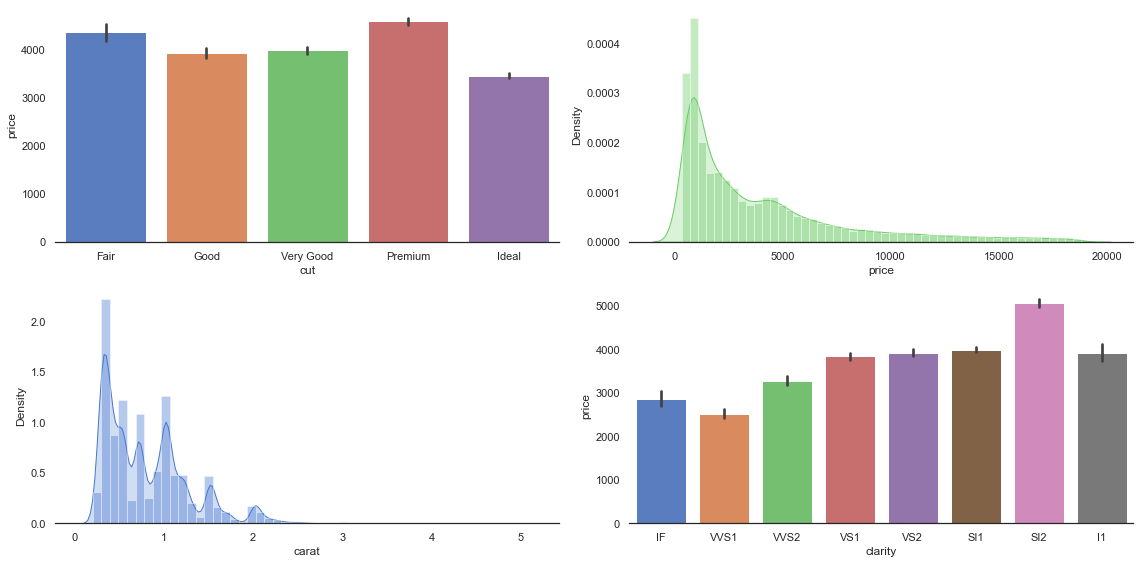

In [14]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=False)
sns.despine(left=True)

sns.barplot(x='cut',y='price',data=df, ax=axes[0, 0]);
# Plot a filled kernel density estimate
sns.distplot(df['price'], color="g", kde_kws={"shade": True}, ax=axes[0, 1]);
# Plot a filled kernel density estimate
sns.distplot(df['carat'], color="b", kde_kws={"shade": True}, ax=axes[1, 0]);
sns.barplot(x='clarity',y='price',data=df, ax=axes[1, 1]);

#plt.setp(axes, yticks=[])
plt.tight_layout()

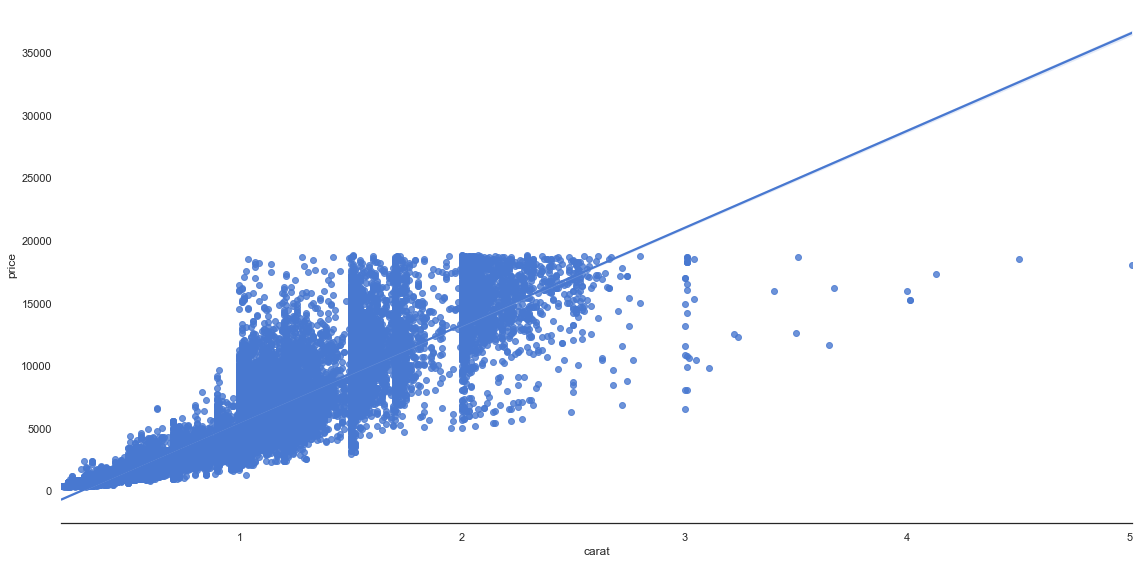

In [16]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(16, 8), sharex=False)
sns.despine(left=True)

# Add a Regression line to see the correlation btw bmi and charges
#sns.scatterplot(x=df['carat'], y=df['price'], ax=axes)
sns.regplot(x=df['carat'], y=df['price'], ax=axes)
#sns.regplot(x=df['depth'], y=df['price'], ax=axes[1])
#sns.regplot(x=df['table'], y=df['price'], ax=axes[2])


#plt.setp(axes, yticks=[])
plt.tight_layout()

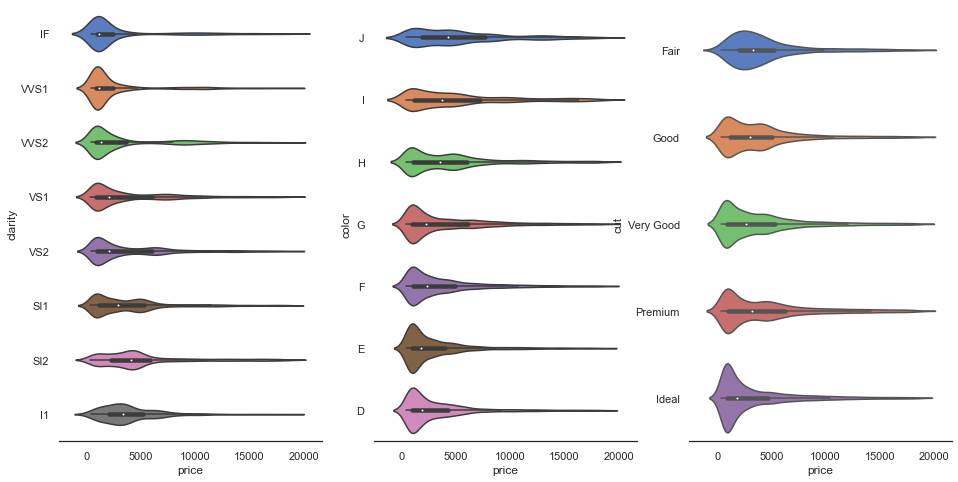

In [19]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes_cat = plt.subplots(1, 3, figsize=(16, 8), sharex=True)
sns.despine(left=True)

# Add a Regression line to see the correlation btw bmi and charges
sns.violinplot(x="price", y="clarity", kind="violin", data=df, ax=axes_cat[0]);
plt.close(2)
sns.violinplot(x="price", y="color", kind="violin", data=df, ax=axes_cat[1]);
plt.close(2)
sns.violinplot(x="price", y="cut", kind="violin", data=df, ax=axes_cat[2]);
plt.close(2)
#plt.setp(axes, yticks=[])
#plt.tight_layout()


In [21]:
pd.concat([df.loc[df['price'] == df['price'].max()],
           df.loc[df['carat'] == df['carat'].max()],
           df.loc[df['depth'] == df['depth'].max()]])

carat      cut color clarity  depth  table  price      x      y     z
27749   2.29  Premium     I     VS2   60.8   60.0  18823   8.50   8.47  5.16
27415   5.01     Fair     J      I1   65.5   59.0  18018  10.74  10.54  6.98
52860   0.50     Fair     E     VS2   79.0   73.0   2579   5.21   5.18  4.09
52861   0.50     Fair     E     VS2   79.0   73.0   2579   5.21   5.18  4.09

In [23]:
pd.DataFrame(df.groupby(['cut','color'])["price"].mean().unstack())
#pd.DataFrame(df.groupby(['cut','color','clarity'])["price"].mean().unstack())

color                J            I            H            G            F  \
cut                                                                          
Fair       4975.655462  4685.445714  5135.683168  4239.254777  3827.003205   
Good       4574.172638  5078.532567  4276.254986  4123.482204  3495.750275   
Very Good  5103.513274  5255.879568  4535.390351  3872.753806  3778.820240   
Premium    6294.591584  5946.180672  5216.706780  4500.742134  4324.890176   
Ideal      4918.186384  4451.970377  3889.334831  3720.706388  3374.939362   

color                E            D  
cut                                  
Fair       3682.312500  4291.061350  
Good       3423.644159  3405.382175  
Very Good  3214.652083  3470.467284  
Premium    3538.914420  3631.292576  
Ideal      2597.550090  2629.094566

# 3. Necessary Preprocessing and ML Models

### Creating Dummy Variable for Categorical Features

In [24]:
cut_dummy = pd.get_dummies(df["cut"],columns=df['cut'].unique())
color_dummy = pd.get_dummies(df["color"],columns=df['color'].unique())
clarity_dummy = pd.get_dummies(df["clarity"],columns=df['clarity'].unique())

df = pd.concat([df, cut_dummy, color_dummy, clarity_dummy],axis=1)

In [25]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'Fair', 'Good', 'Very Good', 'Premium', 'Ideal', 'J', 'I', 'H',
       'G', 'F', 'E', 'D', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2',
       'I1'],
      dtype='object')

### Creating Train, Dev and Test Sets

In [26]:
# Dropping Categorical Variables.
# Dropping Depth, Table, X, Y, Z Features since they are not main contributor to price.
X = df.drop(["cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"],axis=1)
y = df['price']

In [27]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=47, shuffle=True)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_temp, y_train_temp, test_size=0.15, random_state=8, shuffle=True)

In [28]:
print(str([X_train.shape,y_train.shape]) +"\n"+\
      str([X_dev.shape,y_dev.shape]) +"\n"+\
      str([X_test.shape,y_test.shape])
     )

[(38971, 21), (38971,)]
[(6878, 21), (6878,)]
[(8091, 21), (8091,)]


## A. Linear Regression

In [29]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_train, y_train)

#To retrieve the intercept:
    #print(linreg.intercept_)
#For retrieving the slope:
    #print(linreg.coef_)
y_pred_linreg_dev = linreg.predict(X_dev)

In [30]:
df_linreg = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_linreg_dev})
df_linreg

Actual  Predicted
48712    2010    2972.25
30948     449   -1069.50
13340    5504    6700.75
50912    2318    3150.25
9546     4620    4802.50
...       ...        ...
9313     4578    5199.00
16846    6720    6411.75
7826     4297    4365.00
31202     756      45.00
44519    1600    2038.75

[6878 rows x 2 columns]

In [31]:
print('Root Mean Squared Error for Linear Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_linreg_dev)))
print("Accuracy: "+ str(linreg.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Linear Regression: 1156.1402049714995
Accuracy: 91.4520110063981%


## B. Decision Tree Regression

In [32]:
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=5, max_leaf_nodes=40)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_dev)
df_dt = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_dt})
df_dt

Actual    Predicted
48712    2010  2711.234342
30948     449   786.848022
13340    5504  6138.855655
50912    2318  2711.234342
9546     4620  4319.956522
...       ...          ...
9313     4578  4319.956522
16846    6720  6138.855655
7826     4297  4319.956522
31202     756   786.848022
44519    1600  1686.644922

[6878 rows x 2 columns]

In [33]:
print('Root Mean Squared Error for Decision Tree Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_dt)))
print("Accuracy: "+ str(dt.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Decision Tree Regression: 902.0700938570558
Accuracy: 94.79616502072774%


## C. Random Forest Regression

In [34]:
rf = RandomForestRegressor(max_depth = 20, n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_dev)
df_rf = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_rf})
df_rf

Actual    Predicted
48712    2010  2297.393468
30948     449   552.001942
13340    5504  6712.206140
50912    2318  2440.901709
9546     4620  4345.053598
...       ...          ...
9313     4578  4311.599162
16846    6720  6566.079628
7826     4297  4198.803794
31202     756   679.328530
44519    1600  1696.703406

[6878 rows x 2 columns]

In [35]:
print('Root Mean Squared Error for Random Forest Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_rf)))
print("Accuracy: "+ str(rf.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Random Forest Regression: 597.7521974039652
Accuracy: 97.71500471277534%


## d. LightGBM Regressor

In [36]:
lgb = lightgbm.LGBMRegressor(random_state=42)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_dev)
df_lgb = pd.DataFrame({'Actual': y_dev, 'Predicted': y_pred_lgb})
df_lgb

Actual    Predicted
48712    2010  2272.006216
30948     449   557.577114
13340    5504  6595.475361
50912    2318  2528.717013
9546     4620  4330.469711
...       ...          ...
9313     4578  4613.280142
16846    6720  6473.081664
7826     4297  4206.417254
31202     756   704.313603
44519    1600  1611.689865

[6878 rows x 2 columns]

In [37]:
print('Root Mean Squared Error for Random Forest Regression:', np.sqrt(metrics.mean_squared_error(y_dev, y_pred_lgb)))
print("Accuracy: "+ str(lgb.score(X_dev,y_dev)*100) + "%")

Root Mean Squared Error for Random Forest Regression: 564.6625602358988
Accuracy: 97.96098259956936%


# 4. Saving The Model

In [38]:
pickle.dump(lgb, open('diamond.pkl','wb'))

In [39]:
X_train.head(1).values.reshape(1,-1)

array([[2.02, 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]])

In [40]:
diamond = pickle.load(open('diamond.pkl','rb'))
print(diamond.predict(X_train.head(1).values.reshape(1,-1)))

[12758.73722643]


In [41]:
X_train.columns

Index(['carat', 'Fair', 'Good', 'Very Good', 'Premium', 'Ideal', 'J', 'I', 'H',
       'G', 'F', 'E', 'D', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2',
       'I1'],
      dtype='object')